In [60]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

In [61]:
training = pd.read_csv('basic_match_events_training.csv')
training.head()

,Unnamed: 0,id_partido,id_equipo_local,id_equipo_visitante,CENTRO_local,CENTRO DE SAQUE DE BANDA_local,CORNER_local,FALTA_local,GOL_local,GOL ANULADO_local,...,GOL ANULADO_visitante,PENALTY FUERA_visitante,PENALTY PARADO_visitante,PENALTY REPETIDO_visitante,SEGUNDA TARJETA AMARILLA AL JUGADOR_visitante,TARJETA AMARILLA_visitante,TARJETA ROJA_visitante,TIRO A PORTERIA_visitante,TIRO FUERA_visitante,ganador
0,0,1,1,2,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0
1,1,2,3,4,11.0,0.0,10.0,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
2,2,3,5,6,8.0,0.0,2.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2
3,3,4,7,8,4.0,1.0,8.0,9.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1
4,4,5,9,10,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1


In [62]:
y = training.ganador
X = training.drop(['ganador', 'id_equipo_visitante', 'id_equipo_local', 'Unnamed: 0', 'id_partido'], axis=1)

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.10, random_state=42, shuffle=False)

In [133]:
bt = xgb.XGBClassifier(max_depth=100,
                       learning_rate=0.1,
                       n_estimators=100,
                       eta=0.5,
                       gamma=5.515,
                       reg_lambda=0.48,
                       objective='multi:softmax')   # Setup xgboost model
bt.fit(X_train, y_train, # Train it to our data
       eval_set=[(X_valid, y_valid)], 
       verbose=True)


[0]	validation_0-merror:0.431538
[1]	validation_0-merror:0.423077
[2]	validation_0-merror:0.415385
[3]	validation_0-merror:0.412308
[4]	validation_0-merror:0.410769
[5]	validation_0-merror:0.41
[6]	validation_0-merror:0.406923
[7]	validation_0-merror:0.405385
[8]	validation_0-merror:0.404615
[9]	validation_0-merror:0.403077
[10]	validation_0-merror:0.405385
[11]	validation_0-merror:0.402308
[12]	validation_0-merror:0.406154
[13]	validation_0-merror:0.403077
[14]	validation_0-merror:0.405385
[15]	validation_0-merror:0.403077
[16]	validation_0-merror:0.404615
[17]	validation_0-merror:0.403846
[18]	validation_0-merror:0.403077
[19]	validation_0-merror:0.402308
[20]	validation_0-merror:0.403077
[21]	validation_0-merror:0.403077
[22]	validation_0-merror:0.404615
[23]	validation_0-merror:0.402308
[24]	validation_0-merror:0.401538
[25]	validation_0-merror:0.403077
[26]	validation_0-merror:0.403846
[27]	validation_0-merror:0.403846
[28]	validation_0-merror:0.402308
[29]	validation_0-merror:0.4

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.5, gamma=5.515, learning_rate=0.1,
       max_delta_step=0, max_depth=100, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=0.48, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

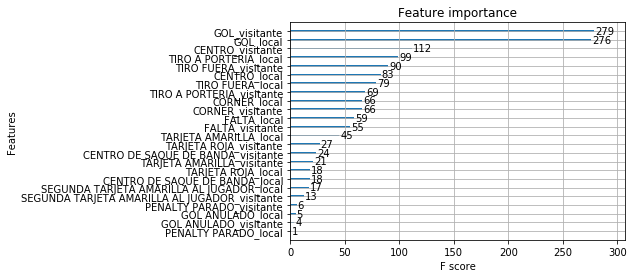

In [134]:
%matplotlib inline  
xgb.plot_importance(bt)

In [135]:
from sklearn.metrics import accuracy_score

y_predict = bt.predict(X_valid)

accuracy_score(y_valid, y_predict)

0.5946153846153847

In [136]:
from sklearn.metrics import f1_score
f1_score(y_valid, y_predict, average='micro')

0.5946153846153847

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_predict)

array([[ 73, 173,  83],
       [ 59, 474,  40],
       [ 59, 113, 226]])